CONTENTS

Import Libraries & Data

Creating a new 'Region' column based on the States column

Spending habits across the different U.S. regions

Creating an exclusion flag for low-activity customers (customers with less than 5 orders)

Creating customer profiles based on age, income and loyalty

Aggregate the max, mean, and min variables for loyalty and expenditure

Studying the relationship between Region and Department

IMPORT LIBRARIES AND DATA

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Importing the Dataset
path = r'C:\Users\lenovo\09-2024 CareerFoundry'
cust_1 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', "ords_new.csv"))

In [3]:
cust_1.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'first_name', 'last_name', 'Gender', 'STATE', 'Age',
       'date_joined', 'number_of_dependants', 'marital_status', 'income'],
      dtype='object')

DEALING WITH PERSONALLY IDENTIFIABLE INFORMATION (PII)

Here, the first name and the last name columns can be used to identify an individual. These columns will be removed from further analysis as they are sensitive.

In [ ]:
cust_1.drop(['first_name','last_name'], axis=1, inplace = True)

CREATING A NEW 'REGION' COLUMN BASED ON THE STATES COLUMN

In [4]:
# creating an empty list to store the region results
cust_region = []

# creating the conditions (which state is which region)
for state in cust_1['STATE']:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        cust_region.append("Northeast")
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio','North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        cust_region.append("Midwest")
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia','West Virginia', 'North Carolina', 'South Carolina', 'Georgia','Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama','Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        cust_region.append("South")
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado','Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon','California', 'Hawaii']:
        cust_region.append("West")

cust_1['Region'] = cust_region
del cust_region

SPENDING HABITS ACROSS THE DIFFERENT U.S. REGIONS

In [7]:
# Crosstab for user_id level (Region vs Spending Flag)
spend_habit = pd.crosstab(cust_1['Region'], cust_1['spending_flag'], dropna=False)

print("Crosstab for Region v. Spending Flag:")
print(spend_habit)

Crosstab for Region v. Spending Flag:
spending_flag  High spender  Low spender
Region                                  
Midwest               17034      5693762
Northeast             10812      4303871
South                 23538      8104245
West                  17910      6239994


Spenders in the South and the West regions are shopping more, both in the Low spending and in the High spending segments.

CREATING AN EXCLUSION FLAG FOR LOW-ACTIVITY CUSTOMERS (CUSTOMERS WITH LESS THAN 5 ORDERS)

In [4]:
cust_1.loc[cust_1['order_number'] < 5, 'activity_flag'] = 'Low-activity customer'
cust_1.loc[cust_1['order_number'] >= 5, 'activity_flag'] = 'High-activity customer'
cust_1 = cust_1[cust_1['activity_flag'] != 'Low-activity customer']

In [3]:
cust_1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'match', 'max_order',
       'loyalty_flag', 'mean_price', 'spending_flag',
       'median_days_since_prior_order', 'frequency_flag', 'Gender', 'STATE',
       'Age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income', 'Region', 'activity_flag'],
      dtype='object')

CREATING CUSTOMER PROFILES BASED ON AGE, INCOME AND LOYALTY

In [4]:
cust_1['Age'].describe()

count    2.441117e+07
mean     4.945738e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [3]:
cust_1.loc[(cust_1['Age'] >= 18) & (cust_1['Age'] <= 35),'Age Category'] = 'Youngsters (18-35 years old)'
cust_1.loc[(cust_1['Age'] >= 36) & (cust_1['Age'] <= 65),'Age Category'] = 'Middle-Aged (36-65 years old)'
cust_1.loc[(cust_1['Age'] >= 66) & (cust_1['Age'] <= 100),'Age Category'] = 'Senior Citizens (65+ years old)'

In [4]:
age_cnt = cust_1.groupby('Age Category')['user_id'].nunique()

Text(0.5, 1.0, 'Count of Customers by Age Category')

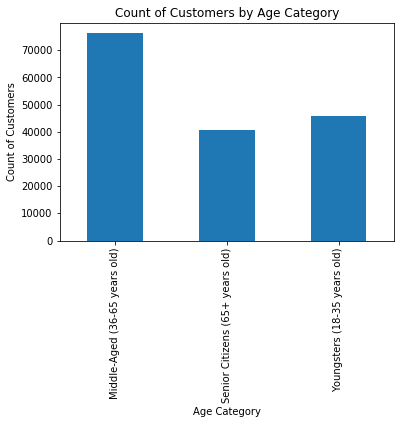

In [5]:
age_cnt.plot.bar()
plt.ylabel('Count of Customers')
plt.title('Count of Customers by Age Category')

We can observe that middle aged shoppers (35 to 65 years of age) are more in number compared to youngsters (18 to 35) and senior citizens (above 65 years old).

In [38]:
cust_1['income'].describe()

count    2.441117e+07
mean     9.987490e+04
std      4.328516e+04
min      2.590300e+04
25%      6.752100e+04
50%      9.683200e+04
75%      1.281470e+05
max      5.939010e+05
Name: income, dtype: float64

In [8]:
#grouping based on income level
cust_1.loc[(cust_1['income'] >= 2.590300e+04) & (cust_1['income'] <= 6.752100e+04),'Income_flag'] = 'Lower Class (> 25.9K & <= 67.5K dollars)'
cust_1.loc[(cust_1['income'] > 6.752100e+04) & (cust_1['income'] <= 1.281470e+05),'Income_flag'] = 'Middle Class (> 67.5K & <= 128.1K dollars)'
cust_1.loc[(cust_1['income'] > 1.281470e+05) & (cust_1['income'] <= 5.939010e+05),'Income_flag'] = 'Upper Class (> 128.1K dollars)'

Text(0.5, 1.0, 'Count of Customers by Income')

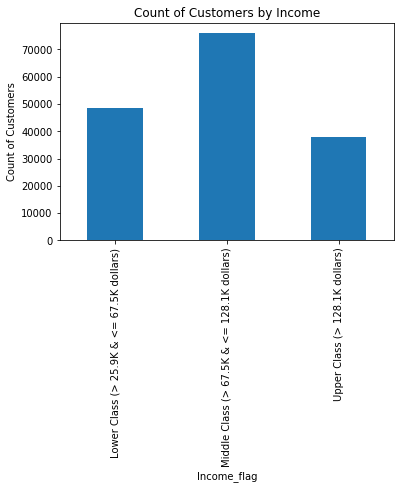

In [9]:
inc_cnt = cust_1.groupby('Income_flag')['user_id'].nunique()
inc_cnt.plot.bar()
plt.ylabel('Count of Customers')
plt.title('Count of Customers by Income')

Most shoppers online hail from middle class backgrounds followed by low income individuals. Fewer shoppers are affluent.

In [13]:
# Create a crosstab for dependants_group and fam_status
crosstab = cust_1.groupby(['Age Category', 'Income_flag'])['user_id'].nunique().unstack(fill_value=0)

# Reset index and melt the crosstab to long-form DataFrame for plotting
cust_1_melt = crosstab.reset_index().melt(id_vars='Age Category', var_name='Income_flag', value_name='count')

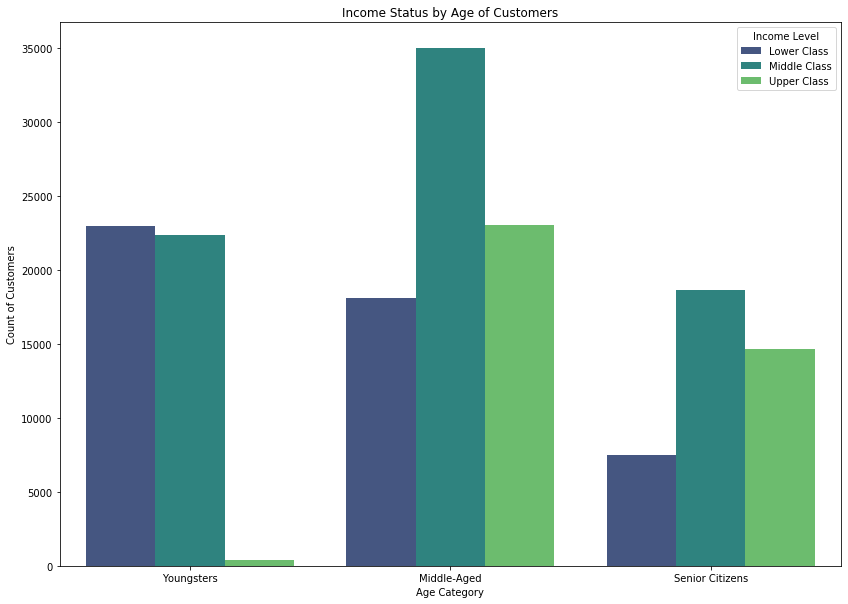

In [15]:
# Define the order for dependants_group: No Kids -> Small Family -> Big Family
age_order = ['Youngsters', 'Middle-Aged', 'Senior Citizens']

# Set the order for the dependants_group column using pd.Categorical
cust_1_melt['Age Category'] = pd.Categorical(cust_1_melt['Age Category'], categories=age_order, ordered=True)

# Step 2: Create a grouped bar chart
plt.figure(figsize=(14, 10))
bar = sns.barplot(x='Age Category', y='count', hue='Income_flag', data=cust_1_melt, palette='viridis')

# Add title and labels
plt.title('Income Status by Age of Customers')
plt.xlabel('Age Category')
plt.ylabel('Count of Customers')
plt.legend(title='Income Level')

There are barely any high earning individuals in the Youngsters category. This is plausible as their earning potential at that age is not promising. Middle class (by income) is edging over the other two income levels among the middle aged and the seniors.

In [36]:
cust_dept = cust_1['department_id'].value_counts()

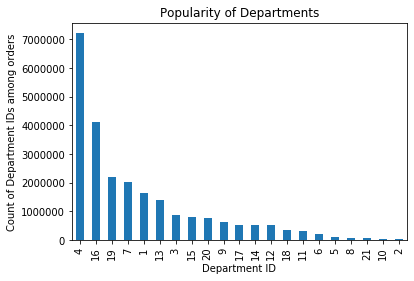

In [45]:
cust_dept.plot.bar()
plt.xlabel('Department ID')
plt.ylabel('Count of Department IDs among orders')
plt.title('Popularity of Departments')
plt.show()

We can see that departments 4,16, and 19 together make up majority of all orders, while departments such as 2, 10, 21 are less popular! Those departments that seem to be extremely popular need a deeper study as they could benefit Instacart's revenue

In [5]:
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', "departments_wrangled.csv"))
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


From the department dataframe, based on our findings, produce, dairy eggs and snacks seem to be very popular while 'bulk' orders are less frequent!

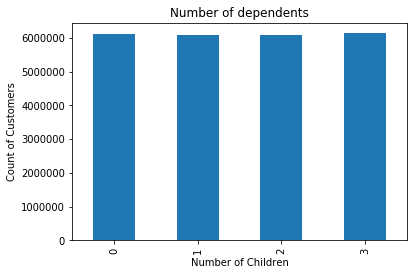

In [11]:
cust_depend = cust_1['number_of_dependants'].value_counts().sort_index(inplace=False)
cust_depend.plot.bar()
plt.xlabel('Number of Children')
plt.ylabel('Count of Customers')
plt.title('Number of dependents')
plt.show()

There's hardly any difference between the number of dependents in the Instacart dataframe!

In [5]:
cust_1.loc[cust_1['number_of_dependants'] == 0,'dependent_flag'] = 'No dependents' 
cust_1.loc[cust_1['number_of_dependants'] != 0,'dependent_flag'] = 'Has dependents'
marital_dep = pd.crosstab(cust_1['marital_status'], cust_1['dependent_flag'], dropna = False)
marital_dep

dependent_flag,Has dependents,No dependents
marital_status,,
divorced/widowed,0,2088879
living with parents and siblings,1171251,0
married,17135805,0
single,0,4015231


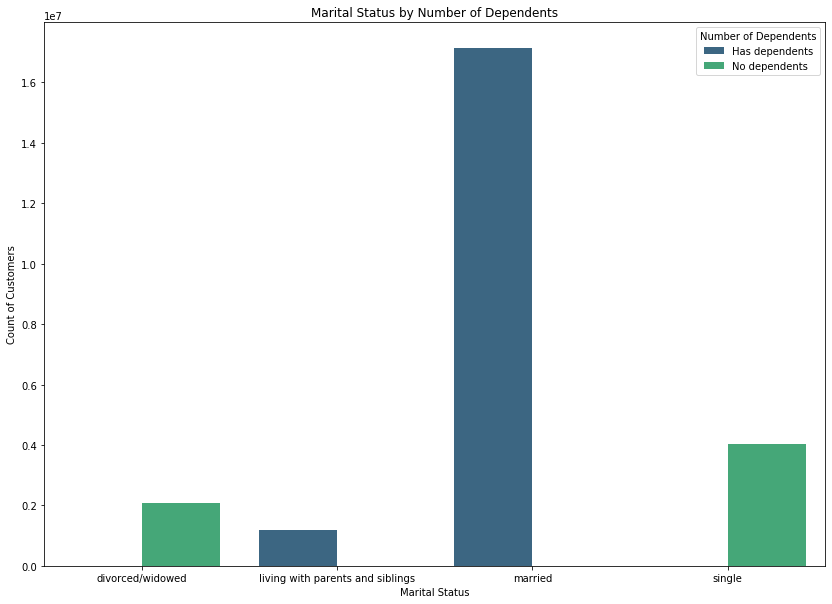

In [29]:
marital_dep = marital_dep.reset_index().melt(id_vars='marital_status', var_name='dependent_flag', value_name='count')

# Step 2: Create a grouped bar chart
plt.figure(figsize=(14, 10))
bar = sns.barplot(x='marital_status', y='count', hue='dependent_flag', data=marital_dep, palette='viridis')

# Add title and labels
plt.title('Marital Status by Number of Dependents')
plt.xlabel('Marital Status')
plt.ylabel('Count of Customers')
plt.legend(title='Number of Dependents')

As expected, married customers have dependents, but surprisingly divorced/widowed individuals have no dependents. Customers who are 'single', also have no dependents, while the population of young adults in the dataframe have dependents.

It would be interesting to see what sort of products middle income people shop for as they edge over the others across each age group!

In [6]:
mid_inc_prod = cust_1[cust_1['Income_flag'] == 'Middle Class']

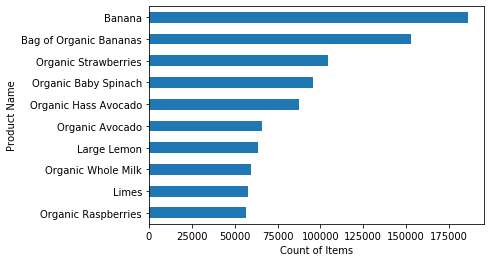

In [17]:
top10 = (mid_inc_prod['product_name'].value_counts()).iloc[:10]
top10_chart = top10.plot(kind='barh')
top10_chart.set_xlabel('Count of Items')
top10_chart.set_ylabel('Product Name')
top10_chart.invert_yaxis()

Bananas, strawberries, spinach, avocados, milk ... (Groceries) seem to be the most selling items which comes across as no surpirse!

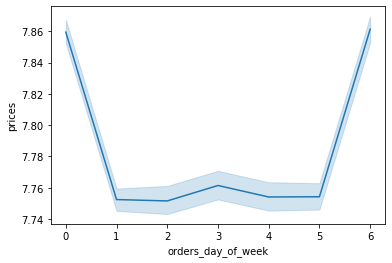

In [3]:
np.random.seed(4)
dev = np.random.rand(len(cust_1)) <= 0.7

small = cust_1[~dev]

df_2 = small[['orders_day_of_week','prices']]
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

Here, we find that shopping is more frequent during the weekends than during the weekdays!

In [4]:
del small
del df_2

AGGREGATE THE MAX, MEAN AND MIN VARIABLES FOR LOYALTY AND EXPENDITURE

In [10]:
# Aggregate variables for customer profiles for expenditure
customer_agg = cust_1.groupby('loyalty_flag').agg({'prices': ['max', 'min', 'mean']})
customer_agg.reset_index(inplace=True)
customer_agg

loyalty_flag prices               
                       max  min      mean
0    Loyal customer   25.0  1.0  7.774434
1      New customer   25.0  1.0  7.802461
2  Regular customer   25.0  1.0  7.800892

Frequency of orders among different customers based on their loyalty! There does not seem to be any significant difference among the customers based on their loyalty!

In [13]:
reg_loy = pd.crosstab(cust_1['Region'], cust_1['loyalty_flag'], dropna = False)
reg_loy = reg_loy.reset_index().melt(id_vars='Region', var_name='loyalty_flag', value_name='count')

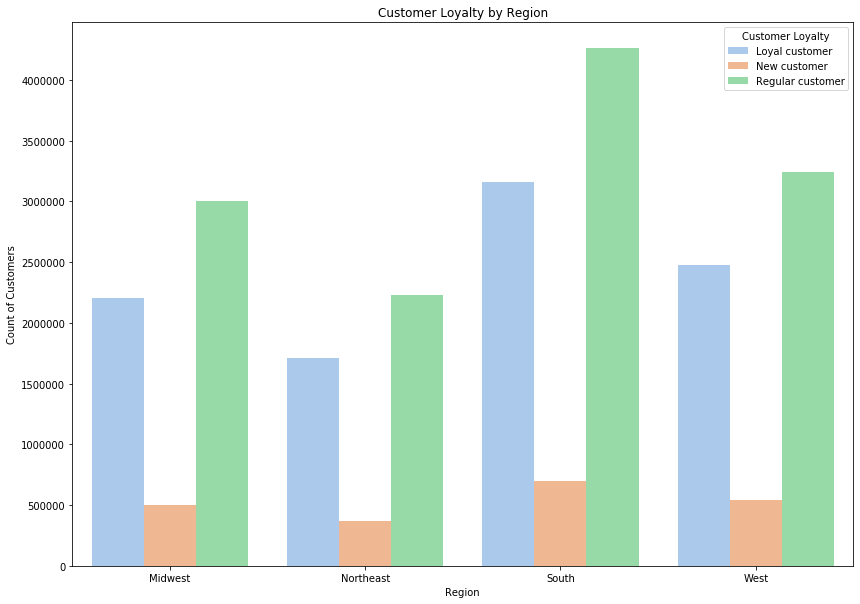

In [17]:
# Step 2: Create a grouped bar chart
plt.figure(figsize=(14, 10))
bar = sns.barplot(x='Region', y='count', hue='loyalty_flag', data=reg_loy, palette='pastel')

# Add title and labels
plt.title('Customer Loyalty by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers')
plt.legend(title='Customer Loyalty')

The South is home to the largest customer base across all the regions. It's also home to the largest group of loyal customers!

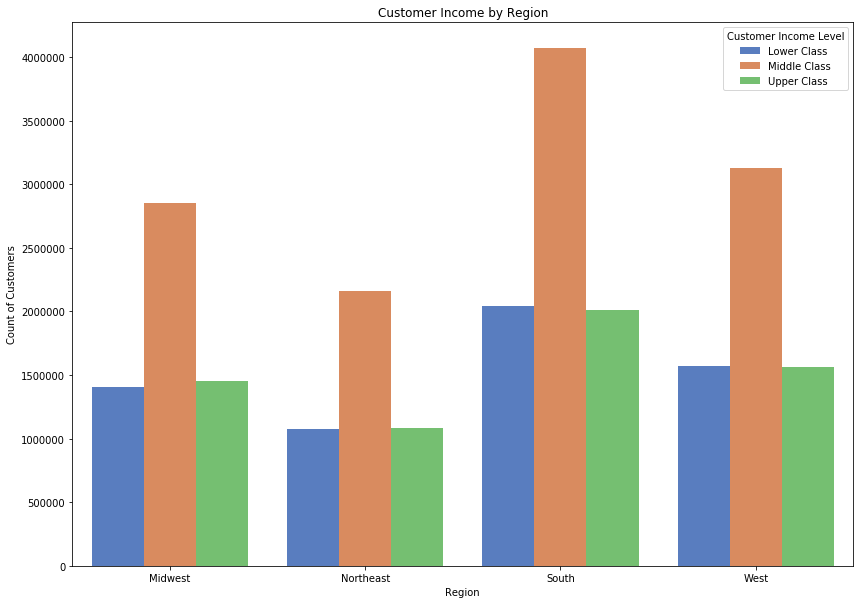

In [21]:
reg_spe = pd.crosstab(cust_1['Region'], cust_1['Income_flag'], dropna = False)
reg_spe = reg_spe.reset_index().melt(id_vars='Region', var_name='Income_flag', value_name='count')

plt.figure(figsize=(14, 10))
bar = sns.barplot(x='Region', y='count', hue='Income_flag', data=reg_spe, palette='muted')

# Add title and labels
plt.title('Customer Income by Region')
plt.xlabel('Region')
plt.ylabel('Count of Customers')
plt.legend(title='Customer Income Level')

In [6]:
cust_1 = cust_1.merge(dept, how='inner')

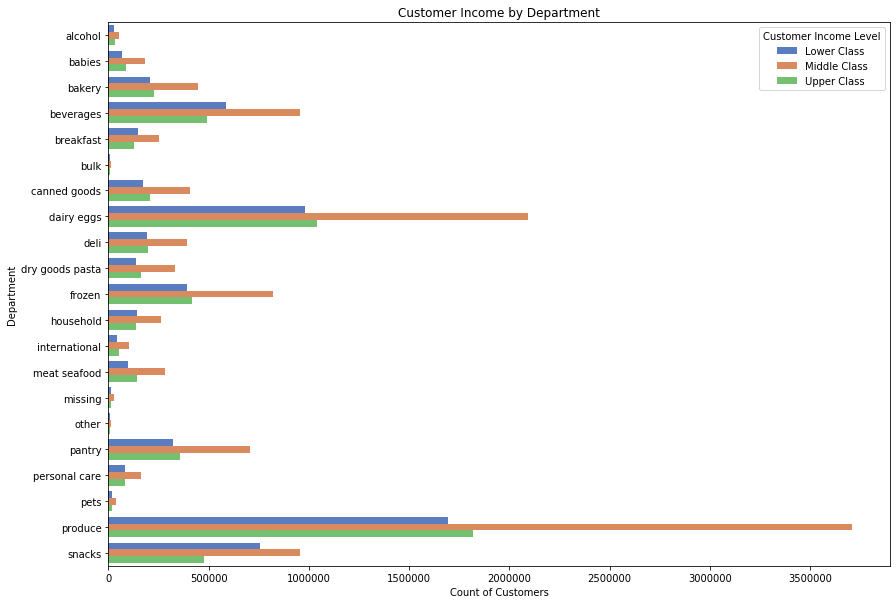

In [9]:
dep_inc = pd.crosstab(cust_1['department'], cust_1['Income_flag'], dropna = False)
dep_inc = dep_inc.reset_index().melt(id_vars='department', var_name='Income_flag', value_name='count')

plt.figure(figsize=(14, 10))
bar = sns.barplot(x='count', y='department', hue='Income_flag', data=dep_inc, palette='muted')

# Add title and labels
plt.title('Customer Income by Department')
plt.ylabel('Department')
plt.xlabel('Count of Customers')
plt.legend(title='Customer Income Level')

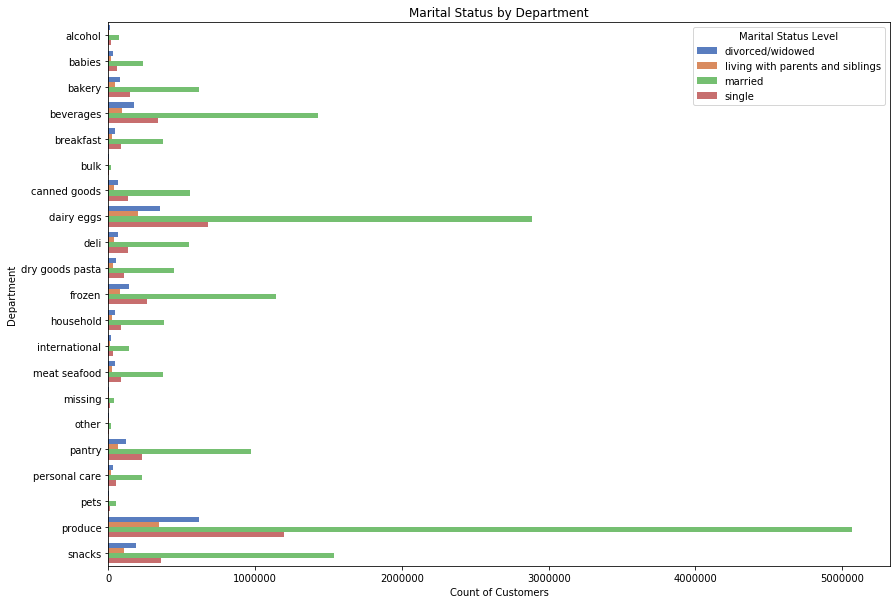

In [10]:
dep_mar = pd.crosstab(cust_1['department'], cust_1['marital_status'], dropna = False)
dep_mar = dep_mar.reset_index().melt(id_vars='department', var_name='marital_status', value_name='count')

plt.figure(figsize=(14, 10))
bar = sns.barplot(x='count', y='department', hue='marital_status', data=dep_mar, palette='muted')

# Add title and labels
plt.title('Marital Status by Department')
plt.ylabel('Department')
plt.xlabel('Count of Customers')
plt.legend(title='Marital Status Level')

STUDYING THE RELATIONSHIP BETWEEN REGION AND DEPARTMENT

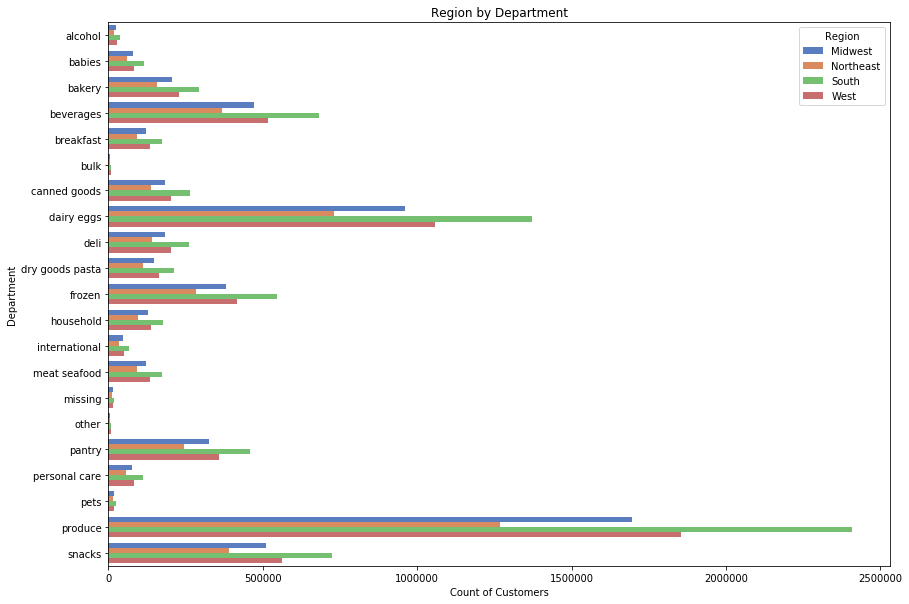

In [7]:
dep_reg = pd.crosstab(cust_1['department'], cust_1['Region'], dropna = False)
dep_reg = dep_reg.reset_index().melt(id_vars='department', var_name='Region', value_name='count')

plt.figure(figsize=(14, 10))
bar = sns.barplot(x='count', y='department', hue='Region', data=dep_reg, palette='muted')

# Add title and labels
plt.title('Region by Department')
plt.ylabel('Department')
plt.xlabel('Count of Customers')
plt.legend(title='Region')